In [24]:
from opt.mc_sim import *
import time
from common.variables import *

In [25]:
import pickle as pkl
from opt.eval_policy import *

filename = "output/msource_value_dic_07-03-2022-08-59-49.pkl"

with open(filename, 'rb') as f:
    output_obj = pkl.load(f)

value_dic = output_obj["state_value_dic"]
model_params = output_obj["model_params"]
sourcingEnv = output_obj["mdp_env"]

In [26]:
# output_obj['approx_di_cost'] 

In [27]:
output_obj

{'state_value_dic': {'[-1, 0, 0, 1, 1]': (-1665.1558986947302, 47),
  '[0, 0, 0, 0, 1]': (-23.480772833756777, 619),
  '[0, 0, 0, 1, 0]': (-16.77953846153846, 59),
  '[-1, 0, 1, 1, 1]': (-2185.1748095144976, 49),
  '[0, 0, 1, 1, 1]': (-1734.372615423739, 50),
  '[0, 0, 1, 0, 1]': (-20.062980275064643, 1061),
  '[0, 0, 1, 1, 0]': (-18.63815384615385, 27),
  '[-1, 0, 2, 1, 1]': (-138.17544064353987, 56),
  '[0, 0, 2, 1, 1]': (-44.18620769464816, 56),
  '[0, 0, 2, 0, 1]': (-19.532373718914524, 1061),
  '[0, 0, 2, 1, 0]': (-18.81553846153846, 33),
  '[-1, 0, 3, 1, 1]': (-1716.7369811828164, 57),
  '[0, 0, 3, 1, 1]': (-19.98008607594937, 51),
  '[0, 0, 3, 0, 1]': (-18.998287443474975, 1092),
  '[0, 0, 3, 1, 0]': (-17.851876923076926, 34),
  '[-1, 0, 4, 1, 1]': (-33.469406943417, 64),
  '[0, 0, 4, 1, 1]': (-21.103286360549586, 51),
  '[0, 0, 4, 0, 1]': (-18.934122322299455, 1181),
  '[0, 0, 4, 1, 0]': (-17.24153846153846, 35),
  '[-1, 0, 5, 1, 1]': (-19.890261538461537, 56),
  '[0, 0, 5, 1, 

In [28]:
# output_obj['adp_cost']

In [29]:
sourcingEnv2 = SourcingEnv(
        lambda_arrival = LAMBDA, # or 10
        procurement_cost_vec = np.array([1, 3]),
        supplier_lead_times_vec = np.array([0.8, 0.5]),
        on_times = np.array([1, 1]), 
        off_times = np.array([np.Inf, np.Inf]))

In [30]:
# best_small_s, best_big_s, best_val = find_opt_ss_policy_via_mc(sourcingEnv, periods = 20, nested_mc_iters = 50)
# best (s, S) policy found by MC:: (2, 5)

In [31]:
# model_params['branch_name'], model_params['git_commit']

In [32]:
# sourcingEnv = SourcingEnv(
#         lambda_arrival = 8, # or 10
#         procurement_cost_vec = np.array([3, 1, 2]),
#         supplier_lead_times_vec = np.array([0.8, 0.5, 1.0]),
#         on_times = np.array([1, 1, 2]), 
#         off_times = np.array([0.3, 1, 0.2]))

# Dual Sourcing
# sourcingEnv = SourcingEnv(
#         lambda_arrival = LAMBDA, # or 10
#         procurement_cost_vec = np.array([3, 1]),
#         supplier_lead_times_vec = np.array([0.8, 0.5]),
#         on_times = np.array([1, 1]), 
#         off_times = np.array([0.3, 1]))

s_custom = MState(stock_level = 0, 
    n_suppliers = N_SUPPLIERS, 
    n_backorders = np.array([0, 0]), 
    flag_on_off = np.array([1, 1]))

mc_avg_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 30,
    nested_mc_iters = 100,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    use_tqdm = True)

# print(mc_avg_costs)

100%|██████████| 100/100 [00:00<00:00, 178.49it/s]


In [33]:
# mc_avg_costs = mc_with_ss_policy(sourcingEnv, 
#     periods = 100,
#     nested_mc_iters = 50,
#     big_s = 5,
#     small_s = 2,
#     h_cost = model_params['policy_params']['h_cost'],
#     b_penalty = model_params['policy_params']['b_penalty'])

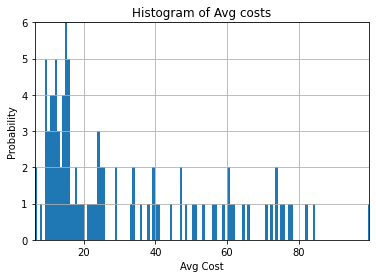

In [34]:
import matplotlib.pyplot as plt
import numpy as np

binwidth = 0.7
n, bins, patches = plt.hist(mc_avg_costs, bins=np.arange( np.min(mc_avg_costs), np.max(mc_avg_costs) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs), np.max(mc_avg_costs))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [35]:
print(np.mean(np.array(mc_avg_costs)))

30.759333333333334


In [36]:
print(np.median(np.array(mc_avg_costs)))

19.45


In [37]:
np.std(np.array(mc_avg_costs))

23.208454197171818

In [38]:
single_supplier_mean_costs = []
for s in range(sourcingEnv2.n_suppliers):

    kwargs = {"periods" : 30,
        "nested_mc_iters" : 30,
        "h_cost": model_params['policy_params']['h_cost'],
        "b_penalty" : model_params['policy_params']['b_penalty'],
        "supplier_index": s
    }

    single_supplier_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
        use_tqdm = True,
        policy_callback = single_source_orderupto_policy,
        **kwargs)
    
    single_supplier_mean_costs.append(np.mean(single_supplier_costs))



100%|██████████| 30/30 [00:03<00:00,  7.81it/s]


In [39]:
single_supplier_mean_costs

[40.846666666666664, 26.919999999999998]

In [40]:
np.min(single_supplier_mean_costs)

26.919999999999998

In [18]:
mc_avg_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 30,
    nested_mc_iters = 50,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=dual_index_policy,
    use_tqdm = True)

  0%|          | 0/50 [00:00<?, ?it/s]/home/larkin/code/multi-sourcing-inventory/sim/policies.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  overshoot_range = np.array([x for x in sourcingEnv.action_history_tuple if tmark_reg < x[0] < tmark_exp])
100%|██████████| 50/50 [03:00<00:00,  3.61s/it]


In [19]:
print(np.mean(np.array(mc_avg_costs)))

24.377999999999997


In [20]:
print(np.median(np.array(mc_avg_costs)))

16.416666666666664


In [21]:
np.std(np.array(mc_avg_costs))

15.95158871920495

In [23]:
eval_steps = 5
mc_eval_iter = 5
eval_costs = mc_eval_policy_perf(sourcingEnv, value_dic, 
    max_steps = eval_steps, 
    mc_iters = mc_eval_iter,
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'])

avg_eval_cost = np.mean(eval_costs)

100%|██████████| 5/5 [01:42<00:00, 20.48s/it]


In [ ]:
eval_costs_scaled = np.array(eval_costs)/eval_steps

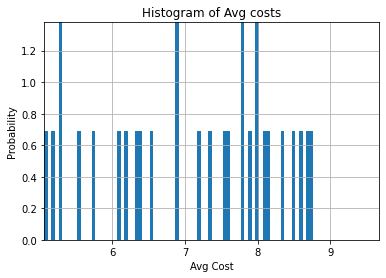

In [ ]:
import numpy as np

binwidth = 0.05

n, bins, patches = plt.hist(eval_costs_scaled, bins=np.arange(min(eval_costs_scaled), max(eval_costs_scaled) + binwidth, binwidth), density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(eval_costs_scaled), np.max(eval_costs_scaled))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [ ]:
np.mean(eval_costs_scaled)

7.171111111111111

In [ ]:
np.median(eval_costs_scaled)

7.433333333333334

In [ ]:
np.std(eval_costs_scaled)

1.2256134770235387

In [ ]:
len(list(value_dic.keys()))

75295

-26.93978494623656

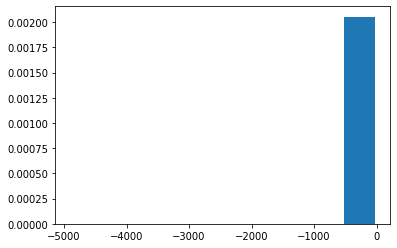

In [ ]:
import numpy as np

binwidth = 0.3

state_vals = [x[0] for x in list(value_dic.values())]
state_visits = [x[1] for x in list(value_dic.values())]

n, bins, patches = plt.hist(state_vals, density = True)
np.max(state_vals)

99

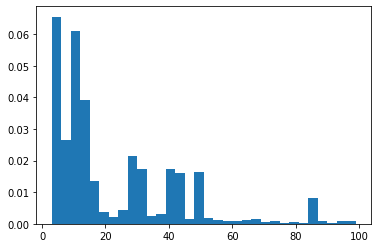

In [ ]:
binwidth = 3
state_visits.remove(1)
state_visits_massage = [x for x in state_visits if 100 > x > 2]

n, bins, patches = plt.hist(state_visits_massage, bins=np.arange(min(state_visits_massage), max(state_visits_massage) + binwidth, binwidth), density = True)
np.max(state_visits_massage)

In [ ]:
np.min(state_visits_massage)

3

In [ ]:
len(set(state_visits))

336

In [ ]:
len(state_visits_massage) - len(state_visits)

-46451

In [ ]:
len(state_visits)

75294

In [ ]:
len(state_vals)

75295

In [ ]:

max(value_dic, key=value_dic.get)


'[28, 36, 22, 1, 1]'

In [ ]:
min(value_dic, key=value_dic.get)

'[-2, 0, 6, 1, 1]'

In [ ]:
value_dic_key_sorted = sorted(value_dic, key=value_dic.get, reverse=True)
value_dic_value_sorted = sorted(value_dic.values(), reverse=True)

In [ ]:
value_diagnostic = list(zip(value_dic_key_sorted, value_dic_value_sorted))

In [ ]:
value_diagnostic

[('[28, 36, 22, 1, 1]', (-26.93978494623656, 1)),
 ('[-4, 35, 55, 1, 1]', (-27.104301075268815, 1)),
 ('[-3, 48, 31, 1, 1]', (-27.13333333333333, 1)),
 ('[-2, 26, 6, 1, 0]', (-27.26236559139785, 11)),
 ('[20, 36, 15, 1, 1]', (-27.387096774193548, 1)),
 ('[4, 5, 3, 1, 1]', (-27.469752688172044, 43)),
 ('[-3, 5, 37, 1, 1]', (-27.478494623655912, 2)),
 ('[-4, 35, 56, 1, 1]', (-27.58279569892473, 1)),
 ('[3, 15, 2, 0, 1]', (-27.583870967741937, 13)),
 ('[-3, 32, 62, 0, 1]', (-27.679569892473115, 1)),
 ('[-3, 52, 16, 1, 1]', (-27.71505376344086, 1)),
 ('[-3, 1, 2, 1, 1]', (-27.825806451612905, 9)),
 ('[-4, 25, 58, 1, 1]', (-27.848387096774196, 1)),
 ('[4, 9, 26, 1, 0]', (-27.880645161290325, 2)),
 ('[14, 57, 4, 1, 1]', (-27.90322580645161, 1)),
 ('[-2, 56, 28, 1, 0]', (-27.903225806451612, 1)),
 ('[-2, 3, 28, 0, 1]', (-27.95412903225806, 11)),
 ('[4, 8, 49, 1, 1]', (-27.96451612903226, 1)),
 ('[-3, 35, 27, 1, 1]', (-28.035483870967735, 1)),
 ('[18, 34, 1, 1, 1]', (-28.060215053763436, 1)),


In [ ]:
with open('output/diagnostic_output.txt', 'w') as f:
    for item in value_diagnostic:
        f.write("{i}\n".format(i = str(item)) )

In [ ]:
item

('[-2, 0, 6, 1, 1]', (-4896.240143454574, 30))

In [ ]:
len(value_dic)

75295